# Problem 1: Handling Missing Data
Compute covariance when some data points are missing.

# Method – Pairwise deletion

In [1]:
import pandas as pd
import numpy as np

# Sample data with missing values
data = {
    'X': [2, 4, np.nan, 8, 10],
    'Y': [1, np.nan, 6, 8, 10],
    'Z': [5, 3, 4, np.nan, 9]
}
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Compute covariance matrix, ignoring NaNs
cov_matrix = df.cov()
print("\nCovariance Matrix (handling missing data):\n", cov_matrix)


Original Data:
       X     Y    Z
0   2.0   1.0  5.0
1   4.0   NaN  3.0
2   NaN   6.0  4.0
3   8.0   8.0  NaN
4  10.0  10.0  9.0

Covariance Matrix (handling missing data):
            X          Y          Z
X  13.333333  19.666667  10.666667
Y  19.666667  14.916667   8.500000
Z  10.666667   8.500000   6.916667


# Explanation:

pandas.DataFrame.cov() automatically handles missing values using pairwise deletion (ignores NaNs in each pair of columns).

# Interpretation:
All three variables show positive associations, with 
𝑋
X and 
𝑌
Y having the strongest link.
However, the covariance values imply impossible correlations (> 1), meaning the matrix is not valid for multivariate analysis.
This likely results from pairwise deletion with missing data, so a consistent method like listwise deletion or imputation is needed.

# Method  – Imputation (fill missing values)

In [2]:
df_mean_imputed = df.fillna(df.mean())
cov_imputed = df_mean_imputed.cov()
print(cov_imputed)


        X          Y         Z
X  10.000   9.875000  5.125000
Y   9.875  11.187500  3.921875
Z   5.125   3.921875  5.187500


# Method  – Listwise deletion


In [3]:
cov_listwise = df.dropna().cov()
print(cov_listwise)


      X     Y     Z
X  32.0  36.0  16.0
Y  36.0  40.5  18.0
Z  16.0  18.0   8.0


# Problem 2: Covariance Matrix in Multivariate Normal Distribution
Role: The covariance matrix defines the shape and orientation of the multivariate normal distribution.

In [4]:
# Mean vector
mean = [0, 0]

# Covariance matrix
cov = [[1, 0.8],  # covariance between X1 and X2
       [0.8, 1]]

# Generate multivariate normal data
data = np.random.multivariate_normal(mean, cov, size=500)
print("\nSample Multivariate Data (first 5 rows):\n", data[:5])

# Compute covariance matrix from generated data
cov_matrix = np.cov(data, rowvar=False)
print("\nCovariance Matrix:\n", cov_matrix)



Sample Multivariate Data (first 5 rows):
 [[-1.16068785 -0.97796708]
 [-1.26581565 -0.62264551]
 [-1.04046639 -0.57166306]
 [ 0.34338426 -0.07329817]
 [ 1.0328048   1.34287471]]

Covariance Matrix:
 [[0.99009368 0.76465287]
 [0.76465287 0.92259954]]


# problem 3: Visualizing Covariance Matrix

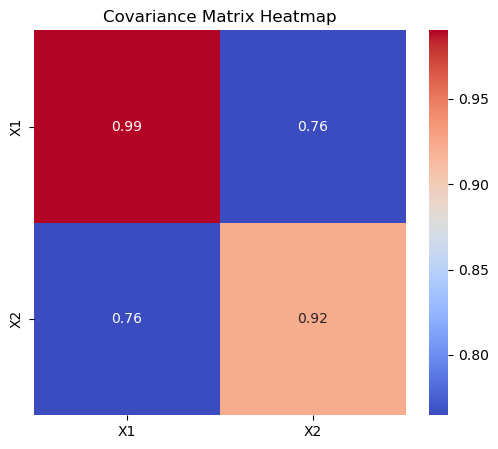

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using the covariance matrix from Problem 2
plt.figure(figsize=(6,5))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=['X1','X2'], yticklabels=['X1','X2'])
plt.title("Covariance Matrix Heatmap")
plt.show()


Te heatmap showing values for two variables (X1 and X2).
From the numbers:

X1 variance ≈ 0.99 (top-left)

X2 variance ≈ 0.92 (bottom-right)

Covariance between X1 and X2 ≈ 0.76 (both off-diagonals)

The color bar suggests higher values are in red, lower in blue.

# Problem 4: Covariance Matrix for Time Series Data

In [6]:
# Sample time series data
dates = pd.date_range('2025-01-01', periods=5)
ts_data = pd.DataFrame({
    'Stock_A': [100, 102, 101, 105, 107],
    'Stock_B': [50, 51, 52, 53, 55],
    'Stock_C': [200, 198, 202, 205, 207]
}, index=dates)

print("Time Series Data:\n", ts_data)

# Compute covariance matrix for returns
returns = ts_data.pct_change().dropna()  # daily returns
cov_matrix = returns.cov()
print("\nCovariance Matrix of Returns:\n", cov_matrix)


Time Series Data:
             Stock_A  Stock_B  Stock_C
2025-01-01      100       50      200
2025-01-02      102       51      198
2025-01-03      101       52      202
2025-01-04      105       53      205
2025-01-05      107       55      207

Covariance Matrix of Returns:
           Stock_A   Stock_B   Stock_C
Stock_A  0.000414  0.000009 -0.000074
Stock_B  0.000009  0.000082  0.000003
Stock_C -0.000074  0.000003  0.000174


# Interpretation 
Stock_A has the highest volatility (0.000414), Stock_B the lowest (0.000082), and Stock_C is in between (0.000174).
Stock_A and Stock_C show a small negative relationship (-0.000074), suggesting mild diversification potential.
Stock_A and Stock_B have a very small positive covariance (0.000009).
Stock_B and Stock_C are almost uncorrelated (0.000003).
Overall, low covariances indicate weak co-movement and possible portfolio risk reduction through diversification.